## Question 1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.datasets import mnist

1.1	Image resizing (interpolation methods)
1.1.1	Linear
1.1.2	Nearest Neighbors
1.1.3	Polynomial 

In [20]:
image = cv2.imread("Picture1.jpg")

In [21]:
resized_linear = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
resized_cubic = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

In [22]:
box_blur = cv2.blur(image, (5, 5))
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
adaptive_blur = cv2.medianBlur(image, 5)

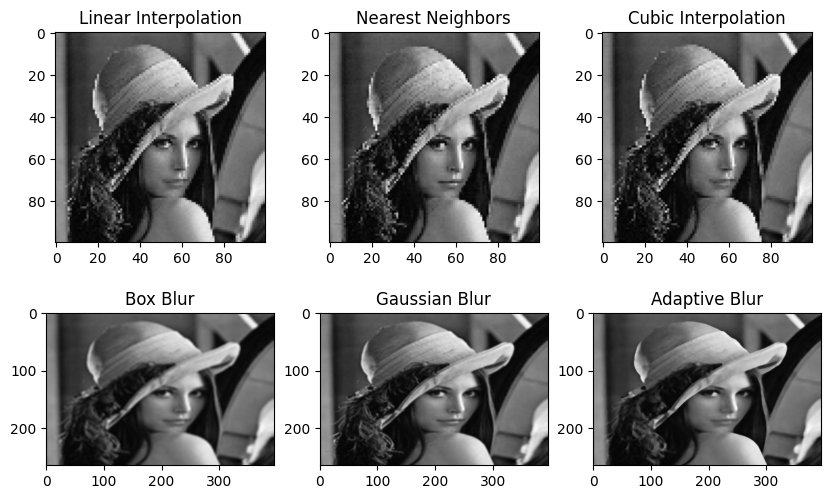

In [29]:
fig, ax = plt.subplots(2,3, figsize=(10, 6))
ax[0, 0].imshow(resized_linear), ax[0, 0].set_title("Linear Interpolation")
ax[0, 1].imshow(resized_nearest), ax[0, 1].set_title("Nearest Neighbors")
ax[0, 2].imshow(resized_cubic), ax[0, 2].set_title("Cubic Interpolation")
ax[1, 0].imshow(box_blur), ax[1, 0].set_title("Box Blur")
ax[1, 1].imshow(gaussian_blur), ax[1, 1].set_title("Gaussian Blur")
ax[1, 2].imshow(adaptive_blur), ax[1, 2].set_title("Adaptive Blur")
plt.show()

## Question 2

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0



In [25]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [26]:
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
}




Model: Naive Bayes
Accuracy: 0.5558
Precision: 0.6917
Recall: 0.5558
F1 Score: 0.5170
Confusion Matrix:
[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51    8  409  107]
 [  19    2    5    4  168    7   63    7  210  497]
 [  71   25    1   20    3   44   40    2  586  100]
 [  12   12    3    1    1    7  895    0   26    1]
 [   0   15    2   10    5    1    5  280   39  671]
 [  13   72    3    7    3   11   12    4  648  201]
 [   5    7    3    6    1    0    1   13   18  955]]
AUC: 0.9778




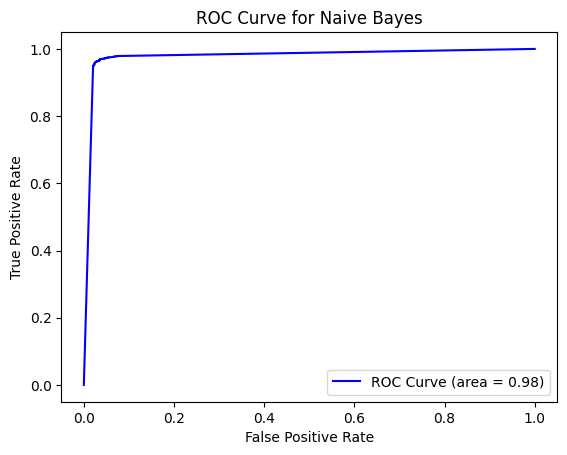




Model: Random Forest
Accuracy: 0.9691
Precision: 0.9691
Recall: 0.9691
F1 Score: 0.9691
Confusion Matrix:
[[ 971    0    1    0    0    2    2    1    3    0]
 [   0 1124    2    3    0    2    3    0    1    0]
 [   4    0 1000    7    3    0    4    8    6    0]
 [   0    0   12  970    0    7    0   10    9    2]
 [   1    0    2    0  954    0    5    0    2   18]
 [   4    1    2   15    3  855    4    3    3    2]
 [   5    3    2    0    3    6  934    0    5    0]
 [   1    4   19    1    2    0    0  990    3    8]
 [   3    0    5    8    5    4    5    4  932    8]
 [   7    6    2   11   11    4    1    3    3  961]]
AUC: 0.9999




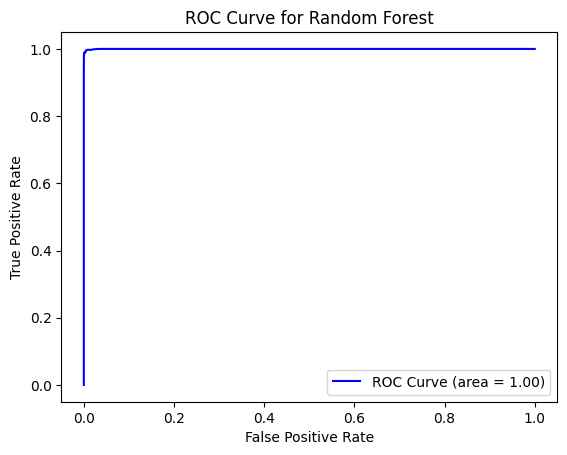

In [ ]:
kf = KFold(n_splits=5)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)
    else:
        roc_auc = None
    
    
    print(f"\n\n\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    if roc_auc is not None:
        print(f"AUC: {roc_auc:.4f}\n\n")


    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (area = {roc_auc:.2f})")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()